# Why are streets of the 'K-beauty mecca' so quiet?

## 1. ASK
### Define the problem & ask the right question

- Myeong-dong, known as 'K-beauty mecca', is a major shopping district in downtown Seoul, especially popular with Chinese tourists. 

- Bustling, noisy and lively -- it is how Myeong-dong used to be described before COVID-19. However, shops and shopping malls in Myeong-dong now remain eerily quiet with "For Lease" signs attached to many storefronts along the main road.

![Myeong-dong](./files/md2.png)

- Is it because the influx of Chinese tourists has plummeted as overseas travel has become difficult due to COVID-19? How many Chinese tourists in Korea have decreased due to COVID-19?

## 2. PREPARE
### Collect data

- Download data from public big data platform operated by Korea Tourism Organization (https://datalab.visitkorea.or.kr/)

In [1]:
import pandas as pd
kto_total = pd.read_excel('./files/kto_total.xlsx', header = 0, usecols = 'D:O', skipfooter = 3)
kto_total.head()

,국적,계,Unnamed: 5,관광,Unnamed: 7,상용,Unnamed: 9,공용,Unnamed: 11,유학연수,Unnamed: 13,기타
0,NaN,인원수,증감률(%),인원수,증감률(%),인원수,증감률(%),인원수,증감률(%),인원수,증감률(%),인원수
1,중국,91252,-1.89,40425,-7.3,11930,22.33,55,66.67,2751,-5.17,36091
2,일본,209184,-12.04,202825,-11.93,1750,-25.63,89,-18.35,549,8.07,3971
3,대만,36399,-2.74,35788,-2.63,41,20.59,17,-37.04,37,-44.78,516
4,홍콩,14545,-42.3,13874,-43.16,55,57.14,NaN,NaN,21,133.33,595


## 3. PROCESS
### Clean data, determine data bias, make data more consistent

In [2]:
kto_total_1 = kto_total.drop(['Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 13'], axis=1)
kto_total_1.head()

,국적,계,관광,상용,공용,유학연수,기타
0,NaN,인원수,인원수,인원수,인원수,인원수,인원수
1,중국,91252,40425,11930,55,2751,36091
2,일본,209184,202825,1750,89,549,3971
3,대만,36399,35788,41,17,37,516
4,홍콩,14545,13874,55,NaN,21,595


- The original data contains visitor information by all nationalities, but only Chinese visitors are required for the analysis

In [3]:
condition = (kto_total_1['국적']=='중국')
kto_total_2 = kto_total_1[condition]
kto_total_2

,국적,계,관광,상용,공용,유학연수,기타
1,중국,91252,40425,11930,55,2751,36091
69,중국,140571,60590,7907,68,29546,42460
137,중국,141457,50330,13549,174,14924,62480
205,중국,147680,84252,13306,212,2199,47711
273,중국,154066,89056,12325,360,2931,49394
...,...,...,...,...,...,...,...
9328,중국,12942,1243,324,6,984,10385
9396,중국,13469,1031,277,16,1063,11082
9464,중국,17103,1011,270,31,9031,6760
9532,중국,19144,1264,354,8,7217,10301


- Translate Korean words into English words

In [4]:
kto_total_3 = kto_total_2.replace('중국', 'Chinese')

In [5]:
df = pd.DataFrame(kto_total_3)
df.columns

Index(['국적', '계', '관광', '상용', '공용', '유학연수', '기타'], dtype='object')

In [6]:
df.columns = ['nationality', 'total', 'tourists', 'business visitors', 'diplomats and other representatives', 'students', 'other']

In [7]:
yearmonth=[]
for yyyy in range(2010, 2022):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2)
        yyyymm='{}{}'.format(yyyy, mm_str)
        yearmonth.append(yyyymm)
del yearmonth[-2:]

print(yearmonth)

['201001', '201002', '201003', '201004', '201005', '201006', '201007', '201008', '201009', '201010', '201011', '201012', '201101', '201102', '201103', '201104', '201105', '201106', '201107', '201108', '201109', '201110', '201111', '201112', '201201', '201202', '201203', '201204', '201205', '201206', '201207', '201208', '201209', '201210', '201211', '201212', '201301', '201302', '201303', '201304', '201305', '201306', '201307', '201308', '201309', '201310', '201311', '201312', '201401', '201402', '201403', '201404', '201405', '201406', '201407', '201408', '201409', '201410', '201411', '201412', '201501', '201502', '201503', '201504', '201505', '201506', '201507', '201508', '201509', '201510', '201511', '201512', '201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804',

In [8]:
df['year/month'] = yearmonth
df

,nationality,total,tourists,business visitors,diplomats and other representatives,students,other,year/month
1,Chinese,91252,40425,11930,55,2751,36091,201001
69,Chinese,140571,60590,7907,68,29546,42460,201002
137,Chinese,141457,50330,13549,174,14924,62480,201003
205,Chinese,147680,84252,13306,212,2199,47711,201004
273,Chinese,154066,89056,12325,360,2931,49394,201005
...,...,...,...,...,...,...,...,...
9328,Chinese,12942,1243,324,6,984,10385,202106
9396,Chinese,13469,1031,277,16,1063,11082,202107
9464,Chinese,17103,1011,270,31,9031,6760,202108
9532,Chinese,19144,1264,354,8,7217,10301,202109


In [9]:
df['year'] = df['year/month'].str.slice(0,4)
df['month'] = df['year/month'].str.slice(4,6)
df.head()

,nationality,total,tourists,business visitors,diplomats and other representatives,students,other,year/month,year,month
1,Chinese,91252,40425,11930,55,2751,36091,201001,2010,01
69,Chinese,140571,60590,7907,68,29546,42460,201002,2010,02
137,Chinese,141457,50330,13549,174,14924,62480,201003,2010,03
205,Chinese,147680,84252,13306,212,2199,47711,201004,2010,04
273,Chinese,154066,89056,12325,360,2931,49394,201005,2010,05


In [10]:
df.tail()

,nationality,total,tourists,business visitors,diplomats and other representatives,students,other,year/month,year,month
9328,Chinese,12942,1243,324,6,984,10385,202106,2021,06
9396,Chinese,13469,1031,277,16,1063,11082,202107,2021,07
9464,Chinese,17103,1011,270,31,9031,6760,202108,2021,08
9532,Chinese,19144,1264,354,8,7217,10301,202109,2021,09
9600,Chinese,14035,1366,322,3,1639,10705,202110,2021,10


## 4. ANALYZE
### What stories data's telling? Reveal gaps & opportunities

In [11]:
df_pivot = df.pivot_table(values = 'tourists', index = 'year', columns = 'month')
df_pivot

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


## 5. VISUALIZE
### Communicate findings effectively

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

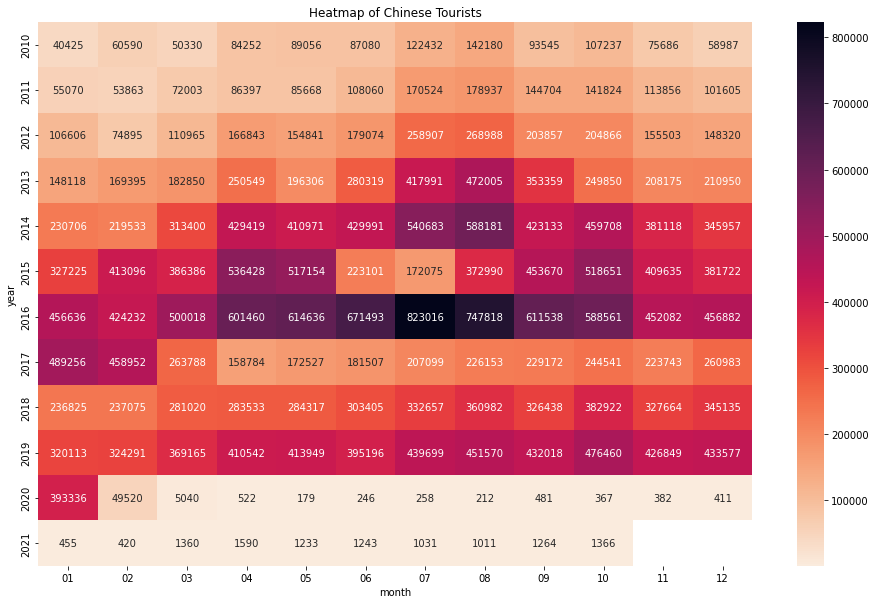

In [13]:
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.title('Heatmap of Chinese Tourists')
plt.show()

## 6. SHARE
### Data-driven storytelling

- From January 2010 to May 2015, the number of Chinese tourists visiting Korea had fluctuated slightly, showing a continuous increase overall.

- However, in June 2015, the number decreased to less than half compared to the previous month. News articles from June to August 2015 suggest that the MERS outbreak was the main cause of the decline during the period.


- The reason why the number of Chinese tourists visiting Korea plunged again in early 2017 was that Chinese government banned group tours over Korea's deployment of a US anti-missile system here. As the Korea-China relations have recovered, the number has increased again.

- February 2020 is the month when the global spread of the COVID-19 began in earnest. From April 2020 to the present, the number of Chinese tourists per month has not exceeded 1600. This is interpreted as the COVID-19 is inhibiting the influx of Chinese tourists at a much more serious level than MERS in 2015 and the heightening political tensions between Seoul and Beijing in 2017.


- In addition, unlike the situations in 2015 and 2017 that were resolved in months, the COVID-19 crisis has been prolonged for almost two years. Due to the 1) seriousness of the situation and the 2) prolonged pandemic, COVID-19 is causing unprecedented overseas travel restrictions.


- As a result of analysis, the reason for the 'hollowing-out' of Myeong-dong can be attributed to the decrease in the number of Chinese tourists due to the continued pandemic.